test


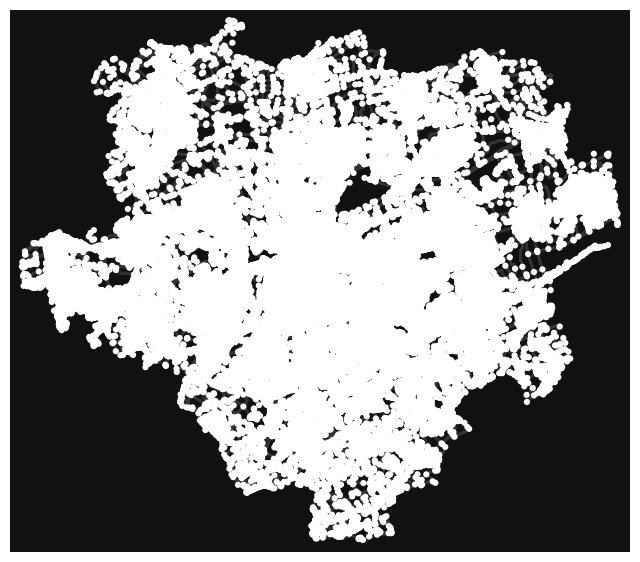

In [1]:
import osmnx as ox
import requests
import pandas as pd
import requests
import networkx as nx
from joblib import Memory
from osmnx import simplification
location = './cache'
memory = Memory(location, verbose=0)




def compute_graph():
    custom_filter ='["bicycle"!~"no"]["foot"!~"no"]["building"!~"."]["amenity"!~"parking"]["railway"!~"."]'
    
    
    # Specify the place name for North Rhine-Westphalia, Germany
    place_name = "Dortmund, North-Rhine Westphalia, Germany"
    print("start")
    # Create the graph for NRW
    G = ox.graph_from_place(place_name, network_type='all')
    print(G)

    return G


compute_graph = memory.cache(compute_graph)
print("test")
G = compute_graph()
fig, ax = ox.plot_graph(G, node_size=20, edge_linewidth=2, edge_color="#333")

In [2]:
# pip install plotly


C:\Users\Lisa Salewsky\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


test
#ff0000
#ff0000
#ff0000
#ff0000
#ff0000
#ff0000
#ff0000
#ff0000
#ff0000
#ff0000
#80ff00
#80ff00
#80ff00
#80ff00
#80ff00
#80ff00
#80ff00
#80ff00
#80ff00
#80ff00
#00ffff
#00ffff
#00ffff
#00ffff
#00ffff
#00ffff
#00ffff
#00ffff
#00ffff
#00ffff
#8000ff
#8000ff
#8000ff
#8000ff
#8000ff
#8000ff
#8000ff
#8000ff
#8000ff
#8000ff


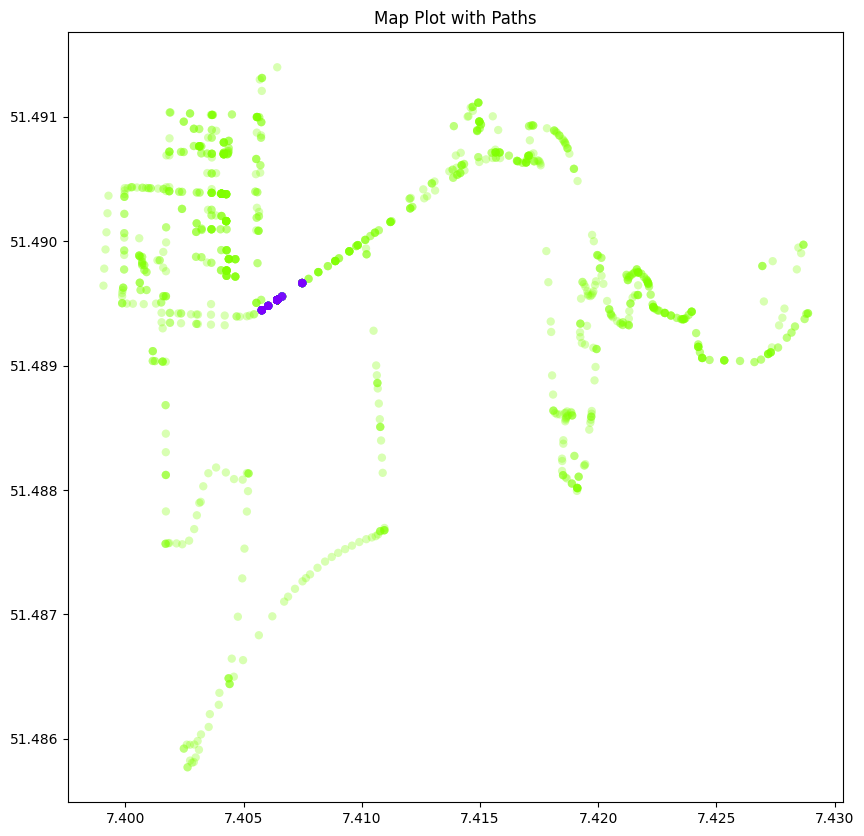

done


In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import json
import ast
import matplotlib.colors as mcolors
import ast
import plotly.graph_objects as go
import requests


# Fetch data from your backend
url = 'https://localhost:44323/Helper/PathParameterTestPage.asmx?op=GeneratePathTestPlot'
# url = 'https://localhost:44323/Helper/PathParameterTestPage.asmx'
# params = {'numberPaths': 2}
# response = requests.post(url, data=params, verify=False)

soap_request = """
<soap:Envelope xmlns:soap="http://www.w3.org/2003/05/soap-envelope" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xsd="http://www.w3.org/2001/XMLSchema">
  <soap:Body>
    <GeneratePathTestPlot xmlns="http://localhost:44323/">
      <numberPaths>4</numberPaths>
    </GeneratePathTestPlot>
  </soap:Body>
</soap:Envelope>
"""


# Headers for the SOAP request
headers = {
    'Content-Type': 'application/soap+xml',  # Specify the SOAP content type
    'charset': 'utf-8',                       # Specify the character encoding
    'SOAPAction': 'http://tempuri.org/GeneratePathTestPlot',  # SOAPAction header value
}
# headers = {'Token': 'AnyRandomToken', 'Content-Type':'application/soap+sml'}
response = requests.post(url, headers=headers, data=soap_request, verify=False)

# Make a POST request with the XML data
# response = requests.post(url, data=xml_data, headers=headers, verify=False)

# Initialize a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Initialize an empty list to store the paths
paths = []


root = ET.fromstring(response.text)
soap_body = root.find('.//{http://www.w3.org/2003/05/soap-envelope}Body')
json_data = soap_body.find('.//{http://localhost:44323/}GeneratePathTestPlotResult').text
# Print the JSON data
# print(json_data)

# If you want to parse the JSON string into a Python object
parsed_json = json.loads(json_data)
# print(parsed_json)
print("test")

for tour in parsed_json:
    for run in tour["runs"]:
        color = run["color"]
        opacity = run["opacity"]
        coordinates = ast.literal_eval(run["values"])
        # Extract latitude and longitude coordinates from the data
        lats = [coord[0] for coord in coordinates]
        lons = [coord[1] for coord in coordinates]
        # Convert RGBA color to hex color code
        hex_color = mcolors.rgb2hex((color['R']/255, color['G']/255, color['B']/255, color['A']/255))
        # Plot the path using matplotlib
        print(hex_color)
        ax.scatter(lons, lats, color=hex_color, alpha=0.3, edgecolors='none')

ax.ticklabel_format(useOffset = False)
# Set title and display the plot
plt.title('Map Plot with Paths')
plt.show()



# # Create a plotly figure
# fig = go.Figure()

# # Plot each path on the same graph
# for tour in parsed_json:
#     color = tour["color"]
#     opacity = tour["opacity"]
#     coordinates = ast.literal_eval(tour["values"])
#     # Extract latitude and longitude coordinates from the data
#     lats = [coord[0] for coord in coordinates]
#     lons = [coord[1] for coord in coordinates]
#     # Convert RGBA color to a valid color format
#     color_str = f'rgba({color["R"]}, {color["G"]}, {color["B"]}, {color["A"]/255})'
#     # Plot each point individually
#     fig.add_trace(go.Scattermapbox(
#         lat=lats,
#         lon=lons,
#         mode='markers',
#         marker=dict(
#             color=color_str,
#             opacity=opacity*2
#         )
#     ))

# # Update layout with map style and axis settings
# fig.update_layout(
#     mapbox_style="carto-positron",
#     mapbox_zoom=10
# )

# fig.show()
print("done")